# Load Data

In [1]:
import pandas as pd

# Load the dataset
file_path = 'bike_sharing_hourly.csv'
bike_sharing_data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
bike_sharing_data.info()
bike_sharing_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011/1/1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011/1/1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011/1/1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011/1/1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011/1/1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Clean Data

In [2]:
# Check for missing values
missing_values = bike_sharing_data.isnull().sum()

# Check for any anomalies in numerical data
statistical_summary = bike_sharing_data.describe()

missing_values, statistical_summary



(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
           instant        season            yr          mnth            hr  \
 count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
 std     5017.0295      1.106918      0.500008      3.438776      6.914405   
 min        1.0000      1.000000      0.000000      1.000000      0.000000   
 25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
 50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
 75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
 max    17379.0000      4.000000      1.000000     12.000000     23.0000

# Explore data

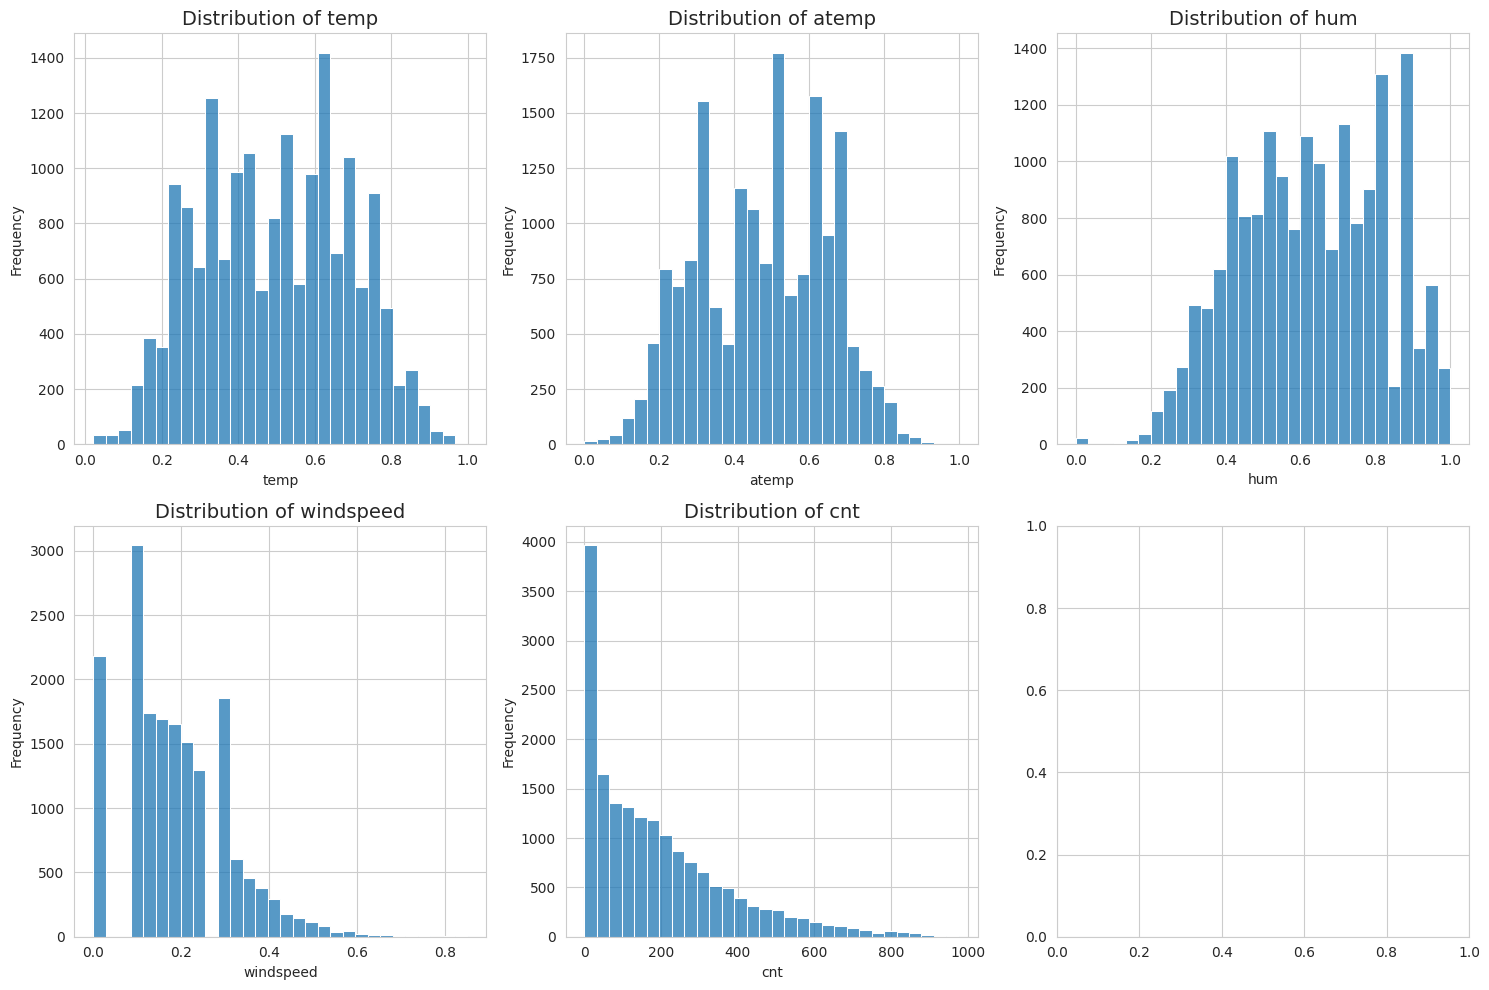

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a function to plot histograms for various features
def plot_histograms(df, features, rows, cols, figsize=(15, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(df[feature], ax=axes[i], kde=False, bins=30)
        axes[i].set_title(f'Distribution of {feature}', fontsize=14)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Selecting features for histograms
features_to_plot = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plot_histograms(bike_sharing_data, features_to_plot, 2, 3)


In [4]:
# Calculate the correlation matrix
correlation_matrix = bike_sharing_data.corr()

# Extracting the correlation with the 'cnt' column
correlation_with_cnt = correlation_matrix['cnt'].sort_values(ascending=False)

correlation_with_cnt



<ipython-input-4-63047d1b7b9c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bike_sharing_data.corr()


cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

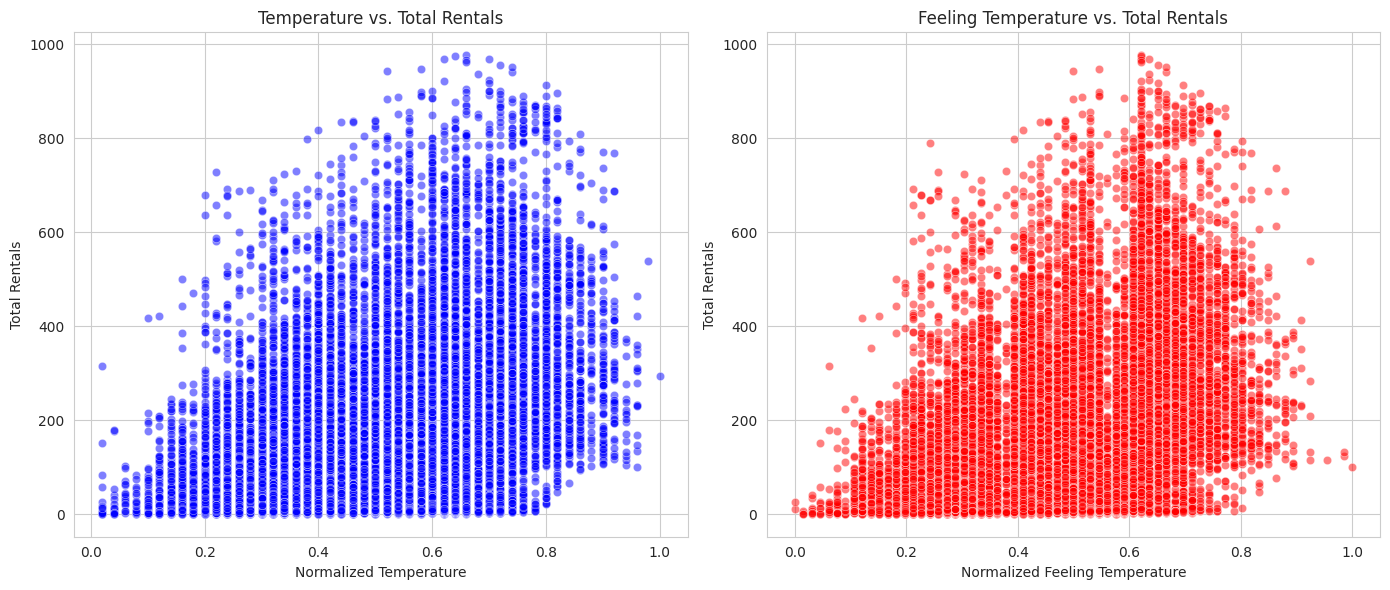

<ipython-input-5-db290fa28c41>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=bike_sharing_data, markers=True, dashes=False, ci=None)


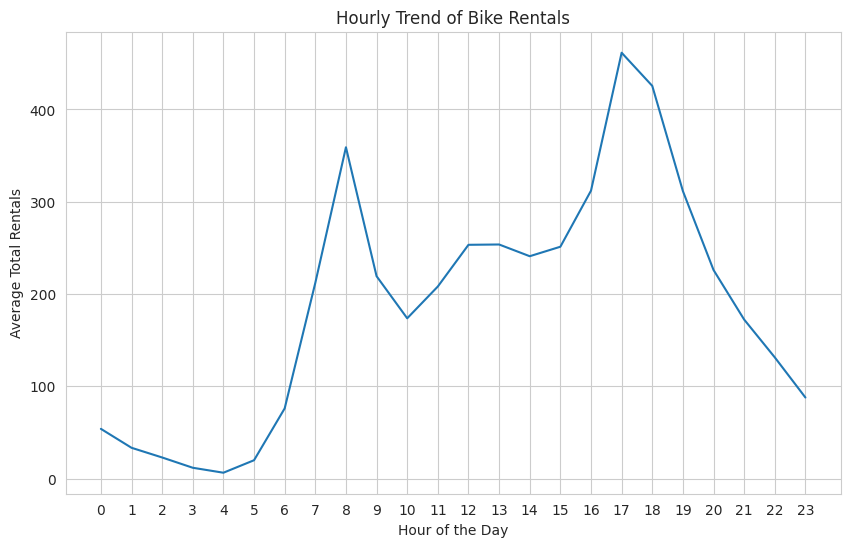

In [5]:
# Visualization of temperature (temp), feeling temperature (atemp) vs. total rentals (cnt)

# Scatter plot of temp vs. cnt
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='temp', y='cnt', data=bike_sharing_data, color='blue', alpha=0.5)
plt.title('Temperature vs. Total Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')

# Scatter plot of atemp vs. cnt
plt.subplot(1, 2, 2)
sns.scatterplot(x='atemp', y='cnt', data=bike_sharing_data, color='red', alpha=0.5)
plt.title('Feeling Temperature vs. Total Rentals')
plt.xlabel('Normalized Feeling Temperature')
plt.ylabel('Total Rentals')

plt.tight_layout()
plt.show()

# Visualization of hourly trend in bike rentals
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=bike_sharing_data, markers=True, dashes=False, ci=None)
plt.title('Hourly Trend of Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Total Rentals')
plt.xticks(range(0, 24))

plt.show()


# Two Class

In [6]:
class BikeRentalAnalysis:
    """
    A class for analyzing bike rental data.
    """

    def __init__(self, dataframe):
        """
        Initialize the class with a pandas DataFrame.
        """
        self.data = dataframe

    def average_rentals_by_category(self, category):
        """
        Calculate and return the average number of rentals for each category of a specified feature.
        """
        return self.data.groupby(category)['cnt'].mean().sort_values(ascending=False)


class WeatherImpact:
    """
    A class to analyze the impact of weather conditions on bike rentals.
    """

    def __init__(self, dataframe):
        """
        Initialize the class with a pandas DataFrame.
        """
        self.data = dataframe

    def correlation_with_weather(self):
        """
        Calculate and return the correlation of weather-related features with total bike rentals.
        """
        weather_features = ['temp', 'atemp', 'hum', 'windspeed', 'weathersit']
        return self.data[weather_features + ['cnt']].corr()['cnt'][:-1].sort_values(ascending=False)


# Create instances of the classes
bike_rental_analysis = BikeRentalAnalysis(bike_sharing_data)
weather_impact = WeatherImpact(bike_sharing_data)

# Example usage of the classes
average_rentals_by_hour = bike_rental_analysis.average_rentals_by_category('hr')
weather_correlation = weather_impact.correlation_with_weather()

average_rentals_by_hour, weather_correlation



(hr
 17    461.452055
 18    425.510989
 8     359.011004
 16    311.983562
 19    311.523352
 13    253.661180
 12    253.315934
 15    251.233196
 14    240.949246
 20    226.030220
 9     219.309491
 7     212.064649
 11    208.143054
 10    173.668501
 21    172.314560
 22    131.335165
 23     87.831044
 6      76.044138
 0      53.898072
 1      33.375691
 2      22.869930
 5      19.889819
 3      11.727403
 4       6.352941
 Name: cnt, dtype: float64,
 temp          0.404772
 atemp         0.400929
 windspeed     0.093234
 weathersit   -0.142426
 hum          -0.322911
 Name: cnt, dtype: float64)

# Statistical Test

In [7]:
from scipy.stats import ttest_ind, ttest_rel

# Independent t-test: Comparing bike rentals on working days vs. non-working days
working_day_rentals = bike_sharing_data[bike_sharing_data['workingday'] == 1]['cnt']
non_working_day_rentals = bike_sharing_data[bike_sharing_data['workingday'] == 0]['cnt']

# Performing the independent t-test
independent_t_test_result = ttest_ind(working_day_rentals, non_working_day_rentals)

# Paired t-test: Comparing bike rentals in 2011 vs. 2012
# Extracting rentals for 2011 and 2012
rentals_2011 = bike_sharing_data[bike_sharing_data['yr'] == 0]['cnt']
rentals_2012 = bike_sharing_data[bike_sharing_data['yr'] == 1]['cnt']

# Ensuring both samples have the same size for a paired t-test
# This is necessary because 2011 and 2012 might have different numbers of days
min_length = min(len(rentals_2011), len(rentals_2012))
rentals_2011 = rentals_2011.sample(min_length)
rentals_2012 = rentals_2012.sample(min_length)

# Performing the paired t-test
paired_t_test_result = ttest_rel(rentals_2011, rentals_2012)

independent_t_test_result, paired_t_test_result



(TtestResult(statistic=3.993973309150058, pvalue=6.524264547107065e-05, df=17377.0),
 TtestResult(statistic=-33.795552435006655, pvalue=2.8732096462987043e-235, df=8644))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparing the data
# Selecting features and target variable
X = bike_sharing_data[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = bike_sharing_data['cnt']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the models
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Making predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluating the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

r2_linear = r2_score(y_test, y_pred_linear)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

(mse_linear, r2_linear), (mse_decision_tree, r2_decision_tree), (mse_random_forest, r2_random_forest)



((19379.82836765172, 0.38798115831391333),
 (3392.90333716916, 0.8928514365053305),
 (1769.8364453122304, 0.9441082123801563))

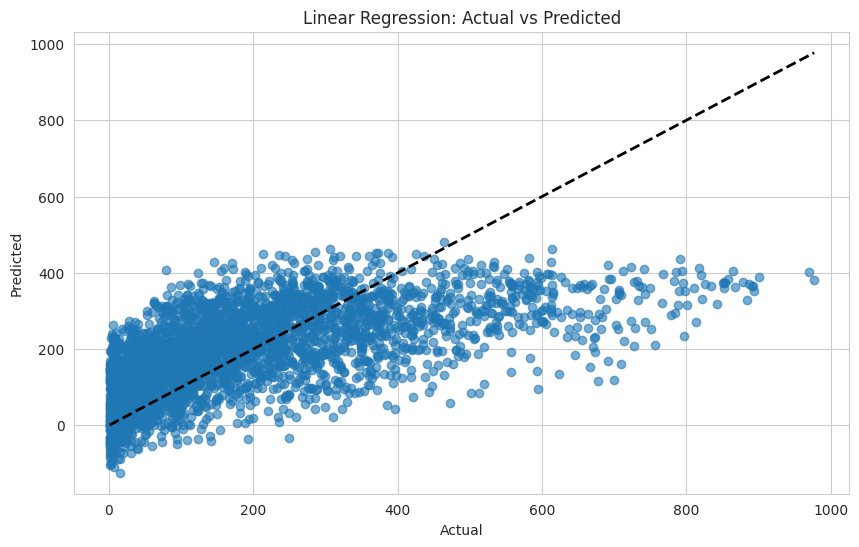

In [11]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plotting actual vs predicted values for each model
plot_actual_vs_predicted(y_test, y_pred_linear, 'Linear Regression: Actual vs Predicted')



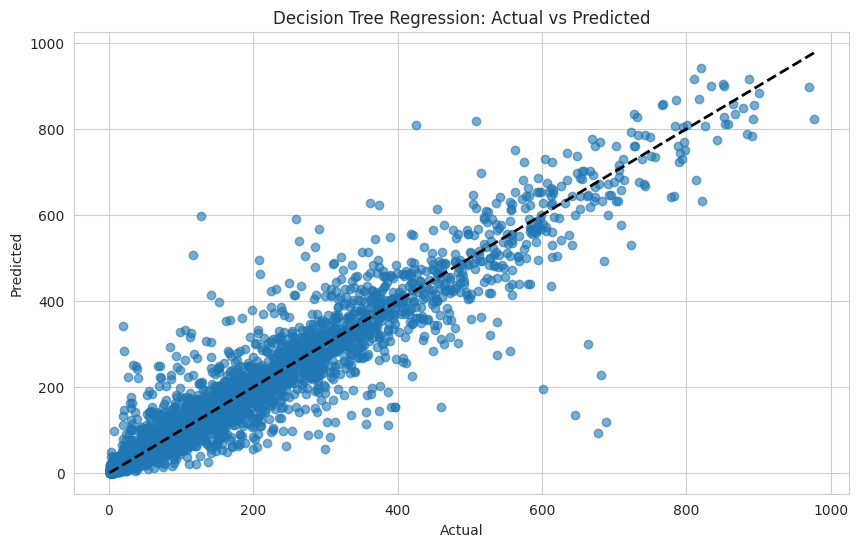

In [12]:
plot_actual_vs_predicted(y_test, y_pred_decision_tree, 'Decision Tree Regression: Actual vs Predicted')

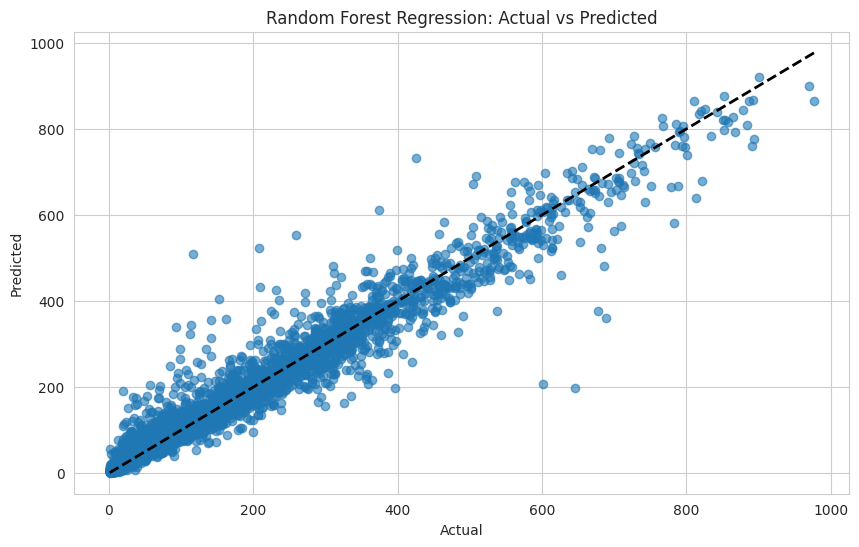

In [13]:
plot_actual_vs_predicted(y_test, y_pred_random_forest, 'Random Forest Regression: Actual vs Predicted')

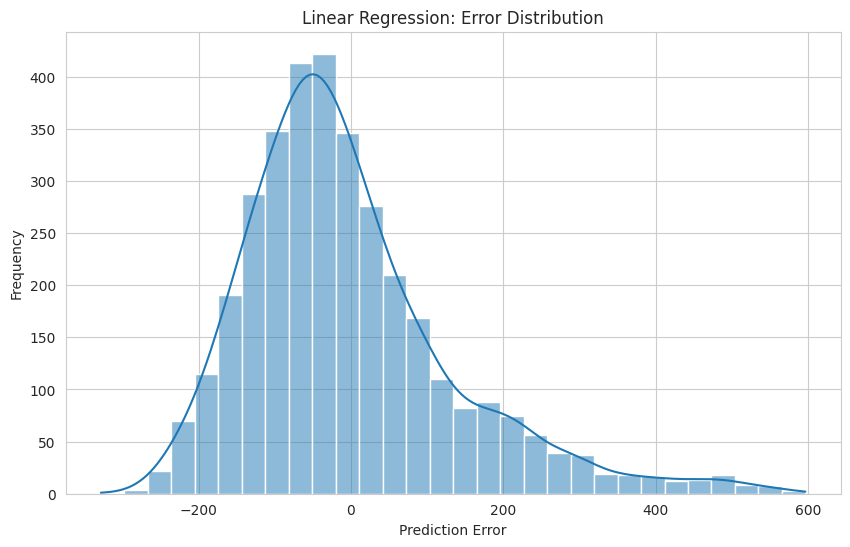

In [14]:
# Function to plot error distribution
def plot_error_distribution(y_test, y_pred, title):
    errors = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True, bins=30)
    plt.title(title)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.show()

# Plotting error distribution for each model
plot_error_distribution(y_test, y_pred_linear, 'Linear Regression: Error Distribution')

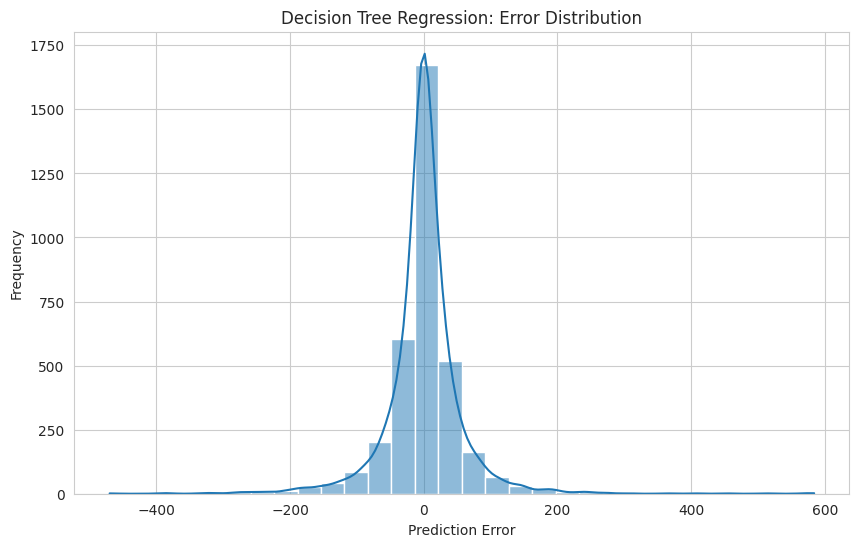

In [16]:
plot_error_distribution(y_test, y_pred_decision_tree, 'Decision Tree Regression: Error Distribution')


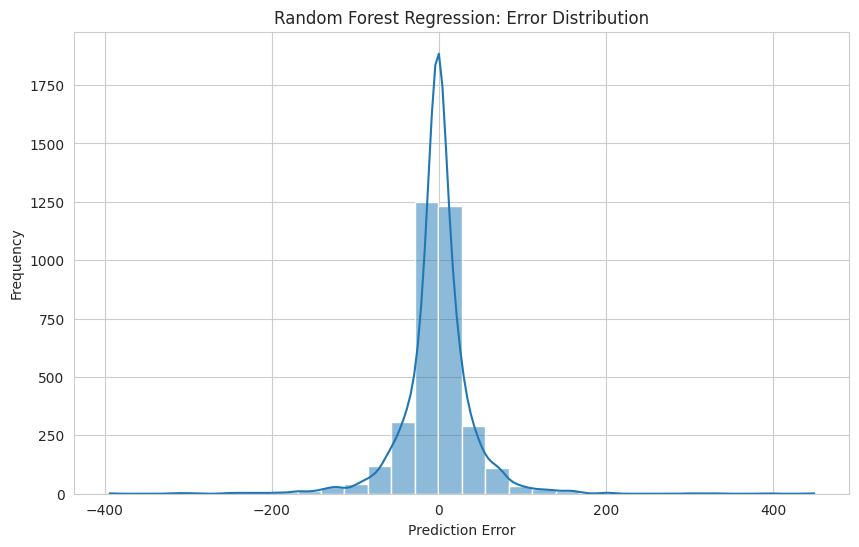

In [17]:
plot_error_distribution(y_test, y_pred_random_forest, 'Random Forest Regression: Error Distribution')